# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [58]:
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 5.)})
sns.set_style('whitegrid')

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [ ]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

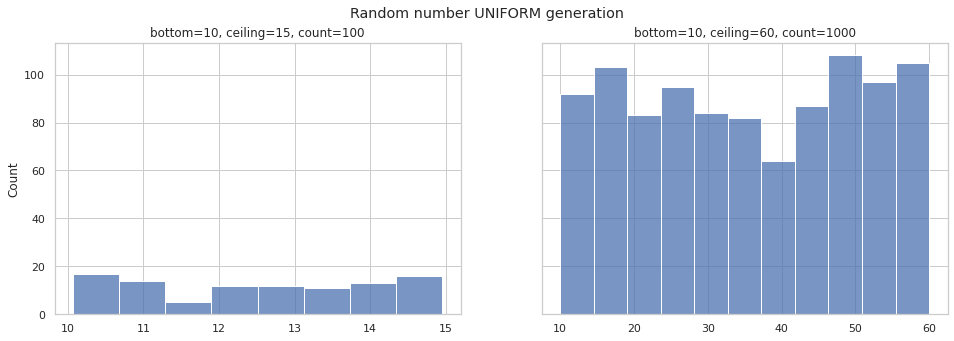

In [40]:
def random_numbers_uniform_generator(bottom , ceiling, count):
    return uniform(loc=bottom, scale=(ceiling-bottom)).rvs(count)

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,5))
fig.suptitle('Random number UNIFORM generation')
axes[0].set_title('bottom=10, ceiling=15, count=100')
axes[1].set_title('bottom=10, ceiling=60, count=1000')

sample1 = random_numbers_uniform_generator( 10 , 15 , 100)
sns.histplot(sample1 , ax=axes[0]);

sample2 = random_numbers_uniform_generator( 10 , 60 , 1000)
sns.histplot(sample2 , ax=axes[1]);


How are the two distributions different?

They are different in the absolut values, but the general trend is to have a flat histogram. 
This is the result of having an uniform distribution.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

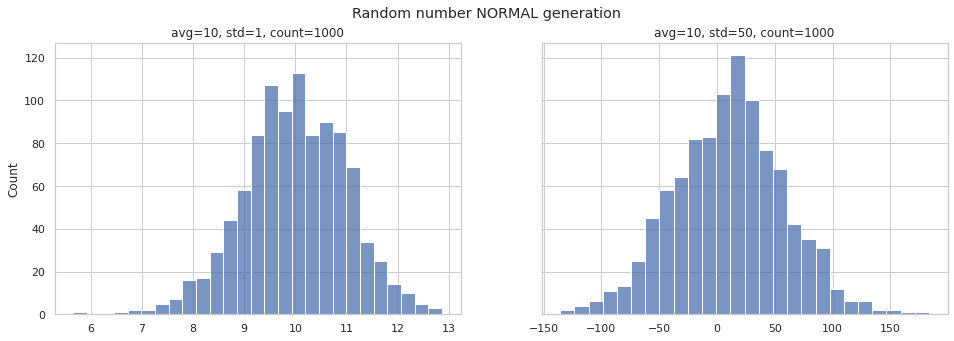

In [41]:
def random_numbers_normal_generator(avg , std, count):
    return norm(loc=avg, scale=std).rvs(count)

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,5))
fig.suptitle('Random number NORMAL generation')
axes[0].set_title('avg=10, std=1, count=1000')
axes[1].set_title('avg=10, std=50, count=1000')

sample1 = random_numbers_normal_generator( 10 , 1 , 1000)
sns.histplot(sample1 , ax=axes[0]);

sample2 = random_numbers_normal_generator( 10 , 50 , 1000)
sns.histplot(sample2 , ax=axes[1]);


How are the two distributions different?

They show very similar form of histograms. Nevertheless, the values in the x-axis are different because they have different standard deviation.
As both have same population of 1000 elements, they show also similar frequences for the central tendencies.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.

In [51]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Then plot the histograms for the following variables:

1. Fuel Barrels/Year

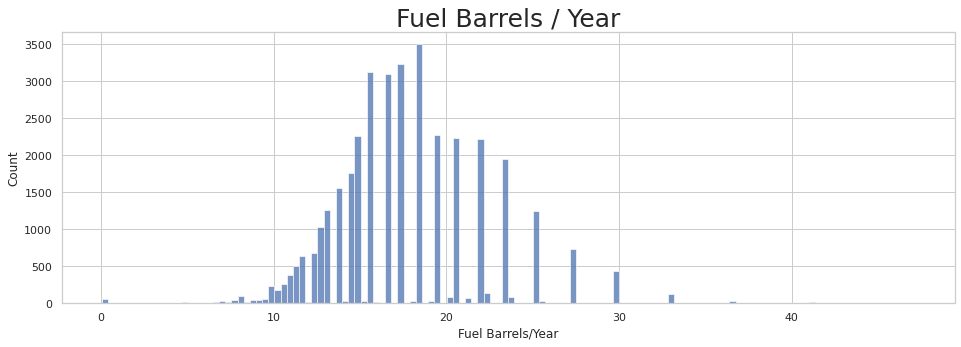

In [59]:
sns.histplot( vehicles["Fuel Barrels/Year"] ).set_title('Fuel Barrels / Year',size=25);


2. CO2 Emission Grams/Mile 

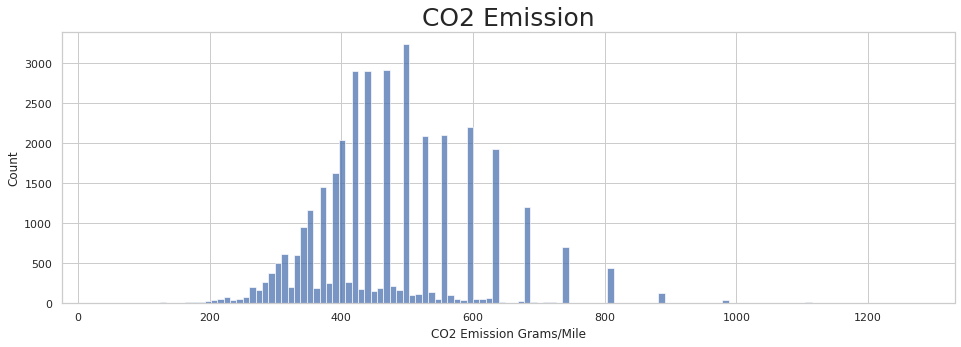

In [60]:
sns.histplot( vehicles["CO2 Emission Grams/Mile"] ).set_title('CO2 Emission',size=25);

3. Combined MPG

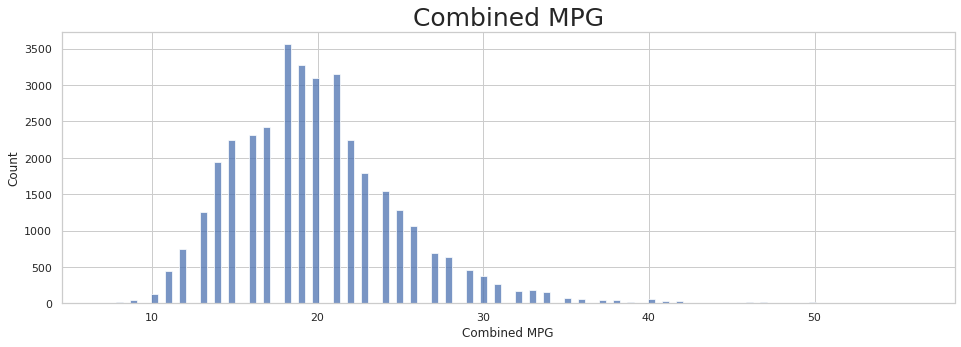

In [61]:

sns.histplot( vehicles["Combined MPG"] ).set_title('Combined MPG',size=25);

Which one(s) of the variables are nearly normally distributed? How do you know?

I think Fuel Barrels / Year is the more likely to a normal distribution. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

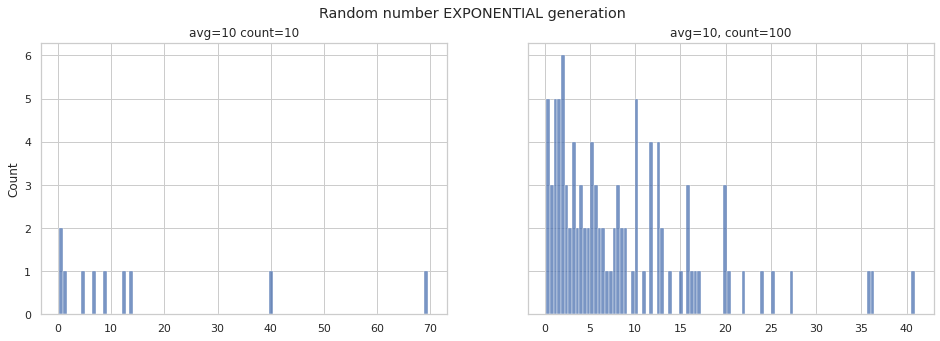

In [65]:
def random_numbers_exponential_generator(std, count):
    return np.random.exponential(scale=std , size=count)


fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,5))
fig.suptitle('Random number EXPONENTIAL generation')
axes[0].set_title('avg=10 count=10')
axes[1].set_title('avg=10, count=100')

sample1 = random_numbers_exponential_generator( 10 , 10)
sns.histplot(sample1 , bins = 100 , ax=axes[0]);

sample2 = random_numbers_exponential_generator( 10 , 100)
sns.histplot(sample2 , bins = 100 , ax=axes[1]);

How are the two distributions different?

In [ ]:
Left one, with a very short sequence, does not show a clear exponential tendency.
Right one, does show an exponential trend.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [67]:
time = expon(scale=10)

print(f"The probability that a customer will spend less than fifteen minutes in the bank is {time.cdf(15).round(3)}")

The probability that a customer will spend less than fifteen minutes in the bank is 0.777


What is the probability that the customer will spend more than 15 minutes

In [69]:
print(f"The probability that a customer will spend MORE than fifteen minutes in the bank is {(1 - time.cdf(15)).round(3)}")

The probability that a customer will spend MORE than fifteen minutes in the bank is 0.223
